Przewidujemy dni zdrowia fizycznego na bazie generalnego samopoczucia i mentalnego

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection, linear_model, datasets, metrics

In [2]:
df = pd.read_csv('brfss_final.csv')
df.head()

,SLEPTIM1,BMI,GENHLTH,MENTHLTH,PHYSHLTH,DIABETE3,CVDINFR4,EXERANY2,SMOKE100,AGE80
0,6.0,25.06,3.0,0.0,0.0,3.0,1.0,2.0,1.0,55.0
1,4.0,23.69,1.0,0.0,0.0,3.0,2.0,2.0,1.0,67.0
2,8.0,23.03,1.0,25.0,26.0,3.0,2.0,2.0,2.0,21.0
3,7.0,23.75,1.0,0.0,0.0,3.0,2.0,1.0,2.0,57.0
4,1.0,45.24,3.0,1.0,5.0,3.0,2.0,1.0,2.0,54.0


In [3]:
#features = ['GENHLTH']
features = ['GENHLTH','MENTHLTH']
label = 'PHYSHLTH'

In [4]:
for feature in features:
    corelation = df[feature].corr(df[label])
    print(f"{feature} has {corelation} corelation with {label}",end="\n")

GENHLTH has 0.5180282423455247 corelation with PHYSHLTH
MENTHLTH has 0.3694396308302567 corelation with PHYSHLTH


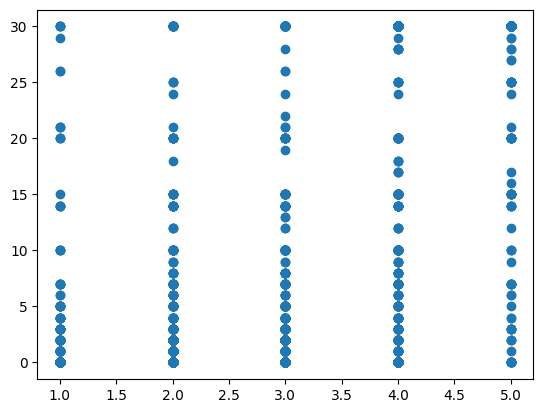

In [5]:
plt.scatter(df['GENHLTH'],df[label])
plt.draw()

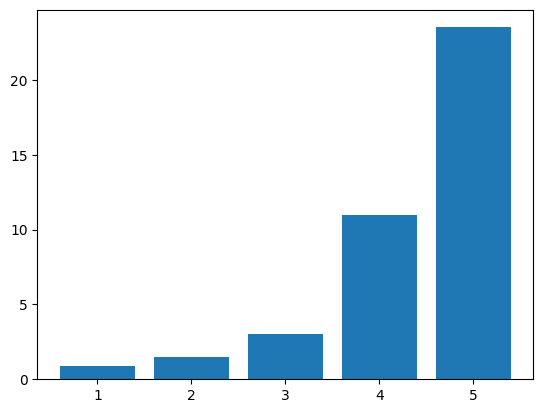

In [6]:
means = df.groupby('GENHLTH')[label].mean()
plt.bar(means.index, means.values)
plt.draw()


0.3694396308302567


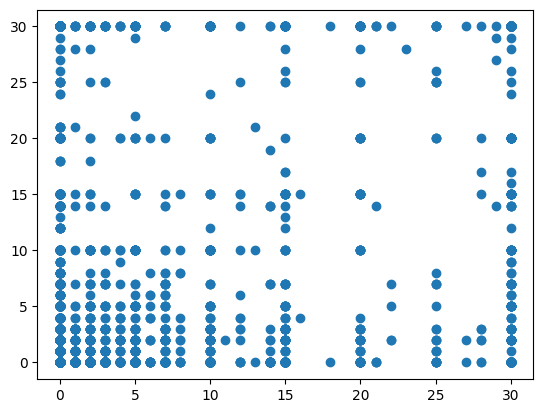

In [7]:
print(df['MENTHLTH'].corr(df[label]))
plt.scatter(df['MENTHLTH'],df[label])

In [8]:
selected = df[features + [label]]
selected

,GENHLTH,MENTHLTH,PHYSHLTH
0,3.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,25.0,26.0
3,1.0,0.0,0.0
4,3.0,1.0,5.0
...,...,...,...
4995,4.0,0.0,30.0
4996,3.0,10.0,7.0
4997,2.0,0.0,0.0
4998,4.0,7.0,10.0


In [9]:
X = df[['BMI','AGE80',]]
y = df['GENHLTH']
X.shape

(5000, 2)

In [10]:
#ilość wierszy ilość kolumn a -1 oznacza wstaw sam
X = X.to_numpy().reshape(-1,2)
X.shape

(5000, 2)

In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.2, random_state = 0)

In [12]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
predictions = model.predict(X_test)
predictions


array([2.14058346, 2.28824262, 2.44315905, 2.64649573, 2.26581379,
       2.16986712, 2.57474724, 2.09763539, 2.42599913, 2.35278314,
       2.91311629, 3.06693209, 2.6700252 , 2.63032211, 2.46471591,
       2.43016538, 3.15212599, 2.48567114, 2.72769107, 2.09449101,
       2.5839634 , 2.57574929, 2.44277643, 2.71916141, 3.87604548,
       2.75631008, 2.42733859, 2.62746178, 2.94079625, 2.80944079,
       2.70120066, 2.42578215, 2.56616626, 2.20617531, 2.41798829,
       3.02214352, 2.390194  , 1.89063552, 2.16336139, 2.78860193,
       2.66046199, 2.75301173, 2.59443211, 2.64793377, 2.51104313,
       2.36943796, 2.50885152, 2.58660471, 2.69183461, 2.57832557,
       2.26922443, 2.76237982, 3.04047319, 3.02391897, 3.03254517,
       2.4707384 , 2.48216192, 2.5661683 , 1.88322631, 2.17353031,
       2.783051  , 2.64643069, 2.5119466 , 2.25691726, 2.67838716,
       2.34435409, 2.6841256 , 2.60583785, 2.8026688 , 2.35400216,
       2.63032211, 2.6554258 , 2.62241188, 2.2549604 , 2.66898

In [14]:
mse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print(f'Mean error: {mse:3.3} ({mse/np.mean(predictions)*100:3.4}%)')

Mean error: 1.0 (39.6%)


In [15]:
# Calculate the coefficient of determination
score = model.score(X_test,y_test)
print('Model determination: ', score)

Model determination:  0.08922042847407463


In [16]:
# plt.scatter(X_test, y_test)
# plt.plot(X_test,predictions)

In [17]:
# szybkie przeczytanie dla danej wartości:
# model.predict([[3.5]])